In [50]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [51]:
# let's import the dataset

df = pd.read_excel('output.xlsx')

In [52]:
df.head(3)

,Unnamed: 0,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:51",69% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",66% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",68% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...


In [53]:
# Let's describe the dataset

df.describe()

,Unnamed: 0,average_rating
count,30000.000000,27554.000000
mean,14999.500000,3.641972
std,8660.398374,0.664232
min,0.000000,1.000000
25%,7499.750000,3.300000
50%,14999.500000,3.800000
75%,22499.250000,4.100000
max,29999.000000,5.000000


In [54]:
# let's get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30000 non-null  int64  
 1   _id              30000 non-null  object 
 2   actual_price     29137 non-null  object 
 3   average_rating   27554 non-null  float64
 4   brand            27932 non-null  object 
 5   category         30000 non-null  object 
 6   crawled_at       30000 non-null  object 
 7   description      29059 non-null  object 
 8   discount         18017 non-null  object 
 9   images           30000 non-null  object 
 10  out_of_stock     30000 non-null  bool   
 11  pid              30000 non-null  object 
 12  product_details  30000 non-null  object 
 13  seller           28259 non-null  object 
 14  selling_price    29998 non-null  object 
 15  sub_category     30000 non-null  object 
 16  title            30000 non-null  object 
 17  url         

- We can see "actual_price", "selling price" are in numerical format but in dataset the datatype of these 2 columns are string(object).
- There are some missing values in actual_price, average_rating, brand, description, discount, seller, selling_price.


In [55]:
# lets check if any row is duplicate

df.duplicated().sum()

0

 - There is no duplicate row present in the dataset.

In [56]:
# Number of brands

num_brands = df['brand'].nunique()

In [57]:
num_brands

324

min price: 150 , max price: 12999
*************************************************************************************


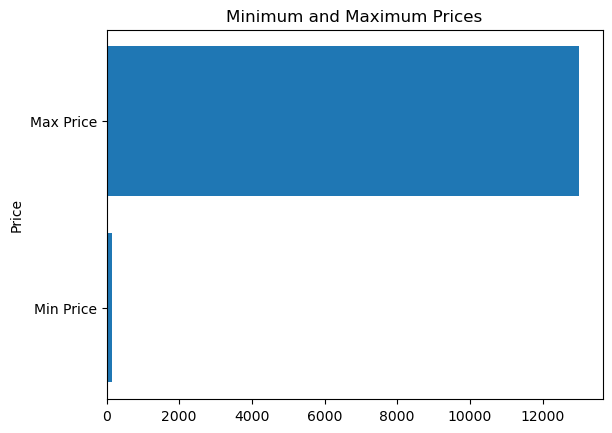

In [58]:
#let find out the price range

df_1 = df.copy()

df_1["actual_price"] = df_1["actual_price"].str.replace(',','') # replacing ","


# as we have missing values in actual_price column as Nan so replace it with 0
df_1["actual_price"] = df_1["actual_price"].fillna(df_1["actual_price"].median())
df_1["actual_price"] = df_1["actual_price"].astype(int) # coverting string column to int
print(f"min price: {df_1['actual_price'].min()} , max price: {df_1['actual_price'].max()}")
print("*************************************************************************************")

plt.barh(['Min Price', 'Max Price'], [df_1['actual_price'].min(), df_1['actual_price'].max()])
plt.ylabel('Price')
plt.title('Minimum and Maximum Prices')
plt.show()

In [59]:
# let's check every brand price range

df_2 = df.copy()

df_2["actual_price"] = df_2["actual_price"].str.replace(',','') # replacing ","


# as we have missing values in actual_price column as Nan so replace it with 0
df_2["actual_price"] = df_2["actual_price"].fillna('0')
df_2["actual_price"] = df_2["actual_price"].astype(int) # coverting string column to int

brand_name = df_2['brand'].unique().tolist()
for i in brand_name:
    print(f"actual_price_{i}_minvalue = {df_2[df_2['brand']== i]['actual_price'].min()}, actual_price_{i}_maxvalue = {df_2[df_2['brand']== i]['actual_price'].max()}")


actual_price_York_minvalue = 1499, actual_price_York_maxvalue = 4599
actual_price_ANGI_minvalue = 399, actual_price_ANGI_maxvalue = 399
actual_price_nan_minvalue = nan, actual_price_nan_maxvalue = nan
actual_price_Man_minvalue = 2199, actual_price_Man_maxvalue = 2199
actual_price_TRANSPERAN_minvalue = 1000, actual_price_TRANSPERAN_maxvalue = 1000
actual_price_DISCOUNT OUTL_minvalue = 449, actual_price_DISCOUNT OUTL_maxvalue = 1625
actual_price_adidas Origina_minvalue = 1999, actual_price_adidas Origina_maxvalue = 4599
actual_price_Fresh Fe_minvalue = 499, actual_price_Fresh Fe_maxvalue = 999
actual_price_SayItLo_minvalue = 799, actual_price_SayItLo_maxvalue = 2299
actual_price_ShreeR_minvalue = 999, actual_price_ShreeR_maxvalue = 1299
actual_price_Fairdea_minvalue = 596, actual_price_Fairdea_maxvalue = 1899
actual_price_Jagdish Garmen_minvalue = 1499, actual_price_Jagdish Garmen_maxvalue = 2199
actual_price_Jack Roy_minvalue = 998, actual_price_Jack Roy_maxvalue = 2596
actual_price_SMA

actual_price_BS S_minvalue = 999, actual_price_BS S_maxvalue = 999
actual_price_ertugrul ghazi c_minvalue = 1499, actual_price_ertugrul ghazi c_maxvalue = 2999
actual_price_YOFA_minvalue = 999, actual_price_YOFA_maxvalue = 1199
actual_price_Natali Trade_minvalue = 499, actual_price_Natali Trade_maxvalue = 649
actual_price_K_minvalue = 899, actual_price_K_maxvalue = 1899
actual_price_shil_minvalue = 499, actual_price_shil_maxvalue = 499
actual_price_Mega Sty_minvalue = 749, actual_price_Mega Sty_maxvalue = 999
actual_price_VIKING.INE_minvalue = 0, actual_price_VIKING.INE_maxvalue = 0
actual_price_She_minvalue = 749, actual_price_She_maxvalue = 999
actual_price_Alderman Sheikhj_minvalue = 575, actual_price_Alderman Sheikhj_maxvalue = 899
actual_price_NETT_minvalue = 1599, actual_price_NETT_maxvalue = 2499
actual_price_MARATH_minvalue = 2000, actual_price_MARATH_maxvalue = 2000
actual_price_MODERN CR_minvalue = 699, actual_price_MODERN CR_maxvalue = 2097
actual_price_Marca Disa_minvalue =

actual_price_Fresh fo_minvalue = 499, actual_price_Fresh fo_maxvalue = 599
actual_price_saltla_minvalue = 600, actual_price_saltla_maxvalue = 2800
actual_price_REEBOK CLASSI_minvalue = 0, actual_price_REEBOK CLASSI_maxvalue = 5999
actual_price_EverLa_minvalue = 2199, actual_price_EverLa_maxvalue = 2499
actual_price_Blue Sha_minvalue = 799, actual_price_Blue Sha_maxvalue = 2699
actual_price_Footprin_minvalue = 300, actual_price_Footprin_maxvalue = 1199
actual_price_Cre_minvalue = 0, actual_price_Cre_maxvalue = 0
actual_price_A_minvalue = 949, actual_price_A_maxvalue = 2999
actual_price_M.R. FASHI_minvalue = 1499, actual_price_M.R. FASHI_maxvalue = 1999
actual_price_Mohan Reta_minvalue = 399, actual_price_Mohan Reta_maxvalue = 399
actual_price_DiscountZila Fashi_minvalue = 2520, actual_price_DiscountZila Fashi_maxvalue = 2999
actual_price_COL_minvalue = 640, actual_price_COL_maxvalue = 770
actual_price_Purple Sta_minvalue = 1899, actual_price_Purple Sta_maxvalue = 2602
actual_price_RELIE

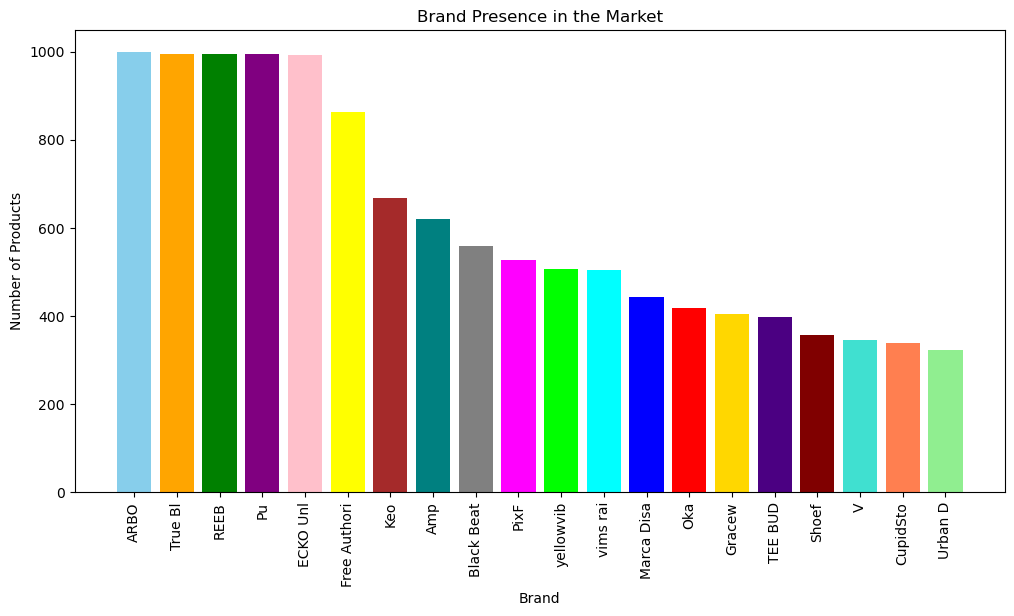

In [60]:
# Top 20 brands which has higher presence in market with high number of products

brand_counts = df_2['brand'].value_counts()

top_20_brands = brand_counts.nlargest(20)

colors = ['skyblue', 'orange', 'green', 'purple', 'pink', 'yellow', 'brown', 'teal', 'gray', 'magenta',
          'lime', 'cyan', 'blue', 'red', 'gold', 'indigo', 'maroon', 'turquoise', 'coral', 'lightgreen']


plt.figure(figsize=(12, 6))
plt.bar(top_20_brands.index, top_20_brands.values, color=colors)
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Brand Presence in the Market')
plt.xticks(rotation=90)  
plt.show()

- We have total 324 different brands present in the Dataset.
- Every brand has diferent price range but there some brands which has same price for every items like - "ANGI", "Man", "TRANSPERAN" etc.
- Brands like - 'ARBO','pu', True BI', 'REEB', 'ECKNO UNI' has strong presence in the market with high number of products

In [61]:
# let's check the price range for every category



category_list = df_2['category'].unique().tolist()

for i in category_list:
    print(f"price_range_category_{i}_minvalue = {df_2[df_2['category']== i]['actual_price'].min()}, price_range_category_{i}_maxvalue = {df_2[df_2['category']== i]['actual_price'].max()}")

price_range_category_Clothing and Accessories_minvalue = 0, price_range_category_Clothing and Accessories_maxvalue = 12999
price_range_category_Bags, Wallets & Belts_minvalue = 399, price_range_category_Bags, Wallets & Belts_maxvalue = 1499
price_range_category_Footwear_minvalue = 0, price_range_category_Footwear_maxvalue = 2990
price_range_category_Toys_minvalue = 499, price_range_category_Toys_maxvalue = 499


In [62]:
# Number of sellers

seller = df_2['seller'].unique().tolist()
len(seller)

535

- There are 535 sellers available in the dataset, also some seller has been changed for the products.

In [63]:
# Average rating of brands(min & max)

brand_rating = df_2.groupby('brand')['average_rating'].agg(['min', 'max'])
brand_rating.head(5)



,min,max
brand,,
A,1.0,4.6
A J STYL,3.5,4.4
A to Z life sty,3.9,3.9
A2Z QUALITY GROU,3.0,5.0
ABC ANY BUDY CLE,3.4,3.4


In [64]:
# mean of average rating of brands

brand_rating_avg = df_2.groupby('brand')['average_rating'].agg(['mean'])
brand_rating_avg.head(5)
                     

,mean
brand,
A,3.035426
A J STYL,3.886813
A to Z life sty,3.900000
A2Z QUALITY GROU,3.518182
ABC ANY BUDY CLE,3.400000


- Average rating of every brand is almost same which is around 3

In [65]:
# Category includes in every brand

for i in brand_name:
    print(f"{i} has {df_2[df_2['brand']== i]['category'].unique().tolist()} categories")

York has ['Clothing and Accessories'] categories
ANGI has ['Clothing and Accessories'] categories
nan has [] categories
Man has ['Clothing and Accessories'] categories
TRANSPERAN has ['Clothing and Accessories'] categories
DISCOUNT OUTL has ['Clothing and Accessories'] categories
adidas Origina has ['Clothing and Accessories'] categories
Fresh Fe has ['Clothing and Accessories'] categories
SayItLo has ['Clothing and Accessories'] categories
ShreeR has ['Clothing and Accessories'] categories
Fairdea has ['Clothing and Accessories'] categories
Jagdish Garmen has ['Clothing and Accessories'] categories
Jack Roy has ['Clothing and Accessories'] categories
SMART ATTRACTI has ['Clothing and Accessories'] categories
Jai Textil has ['Clothing and Accessories'] categories
Solid Styl has ['Clothing and Accessories'] categories
Clo has ['Clothing and Accessories'] categories
n has ['Clothing and Accessories'] categories
BOYT has ['Clothing and Accessories'] categories
CA has ['Clothing and Access

D has ['Clothing and Accessories'] categories
The Dry Ca has ['Clothing and Accessories'] categories
Byford by Pantaloo has ['Clothing and Accessories'] categories
KRV has ['Clothing and Accessories'] categories
Pramukhraj enterpri has ['Clothing and Accessories'] categories
Country h has ['Clothing and Accessories'] categories
TEE BUD has ['Clothing and Accessories'] categories
rarif has ['Clothing and Accessories'] categories
Fesn has ['Clothing and Accessories'] categories
GANTI has ['Clothing and Accessories'] categories
Xi has ['Clothing and Accessories'] categories
Urban D has ['Clothing and Accessories'] categories
Bofri has ['Clothing and Accessories'] categories
HUMANITY ORIGINA has ['Clothing and Accessories'] categories
J has ['Clothing and Accessories'] categories
U.s.Polo Associati has ['Clothing and Accessories'] categories
CANTAB has ['Clothing and Accessories'] categories
RBSO has ['Clothing and Accessories'] categories
M has ['Clothing and Accessories'] categories
Glit

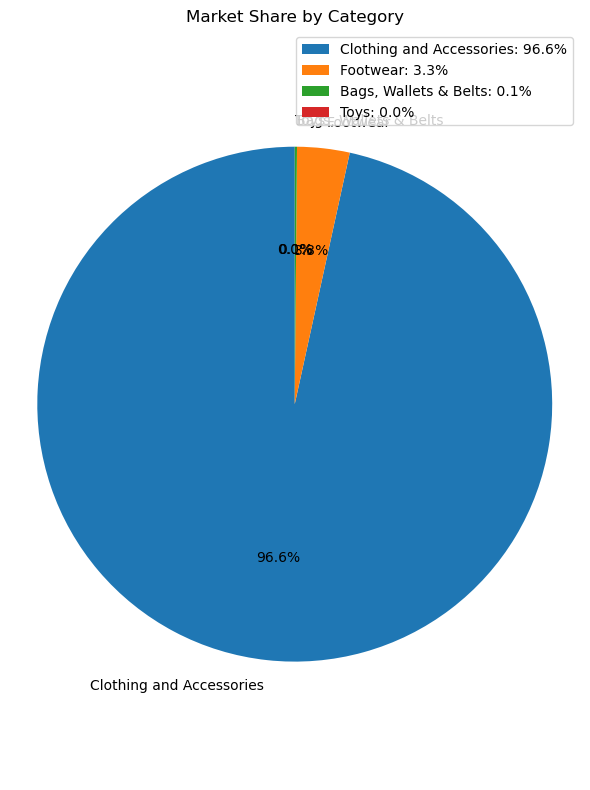

In [66]:
# market share of categories

category_counts = df_2['category'].value_counts()
market_share = category_counts / category_counts.sum()


plt.figure(figsize=(6, 8))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=90,normalize=False)
plt.title('Market Share by Category')
plt.axis('equal')  

category_labels = [f"{category}: {percentage:.1f}%" for category, percentage in zip(market_share.index, market_share * 100)]
plt.legend(category_labels, loc='best')

plt.tight_layout()
plt.show()

- We can clearly see that most brand has 'Clothing and Accesories' category, 'Bags, Wallets & Belts has no brands, 'Toys' has no brand name
- 'Clothing and Accesories' has 96% of market share

In [67]:
# number of sub-category

sub_category_list = df_2['sub_category'].unique().tolist()
sub_category_list

['Bottomwear',
 'Clothing Accessories',
 'Winter Wear',
 'Raincoats',
 'Topwear',
 'Innerwear and Swimwear',
 'Kurtas, Ethnic Sets and Bottoms',
 'Blazers, Waistcoats and Suits',
 'Tracksuits',
 'Sleepwear',
 'SUNSHOPPING Bags, Wallets & Belts',
 'Sunshopping Bags, Wallets & Belts',
 'Crocks Club Clothing and Accessories',
 "Men's Footwear",
 'Fabrics',
 'Inspire Clothing and Accessories',
 'INSPIRE Clothing and Accessories',
 'Winsome Deal Bags, Wallets & Belts',
 'Roy Clothing and Accessories',
 'YOFAMA Bags, Wallets & Belts',
 'Party Supplies',
 'Brand Trunk Bags, Wallets & Belts',
 'mentiezi Bags, Wallets & Belts',
 'Uber Urban Clothing and Accessories']

In [98]:
len(sub_category_list)

24

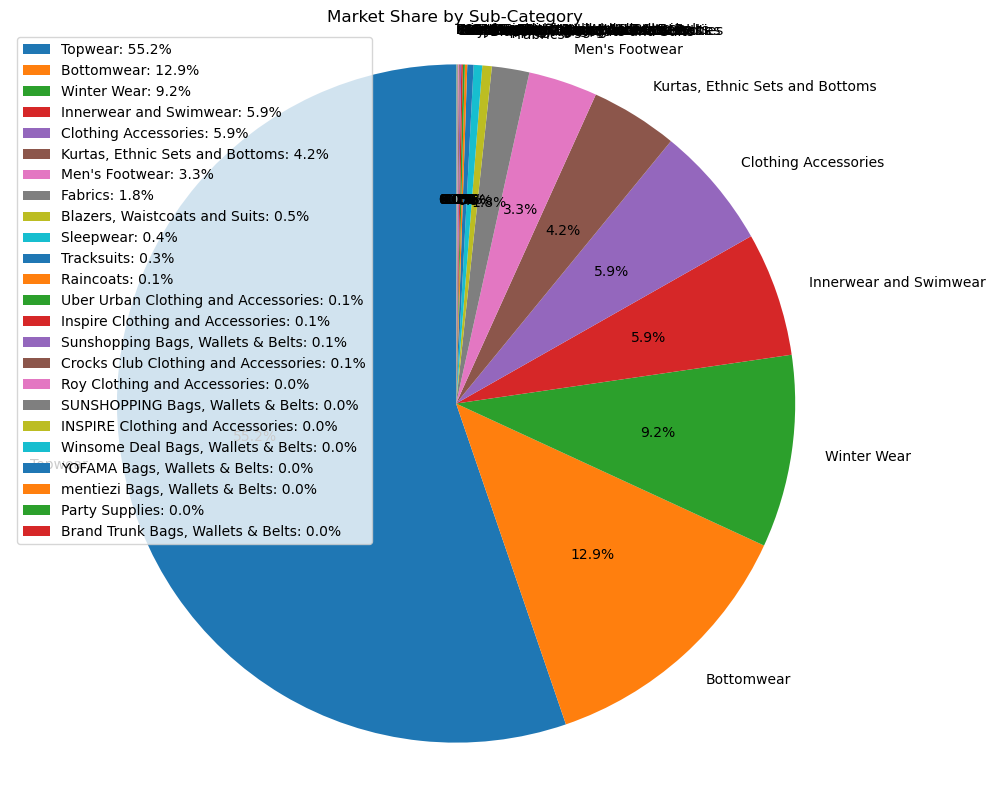

In [68]:
# market share of sub-categories

sub_category_counts = df_2['sub_category'].value_counts()
market_share_subcategory = sub_category_counts / sub_category_counts.sum()
market_share_subcategory

plt.figure(figsize=(10, 8))
plt.pie(market_share_subcategory, labels=market_share_subcategory.index, autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Sub-Category')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

sub_category_labels = [f"{sub_category}: {percentage:.1f}%" for sub_category, percentage in zip(market_share_subcategory.index, market_share_subcategory * 100)]
plt.legend(sub_category_labels, loc='best')

plt.tight_layout()
plt.show()

In [95]:
df_2['discount'].max()

87.0

In [97]:
# checking the min and max off per brand

df_2 = df_2.rename(columns={'discount': 'description2'})
df_2 = df_2.rename(columns={'description': 'discount'})
df_2.drop(columns=['description2'],inplace=True, axis=1)




df_2["discount"] = df_2["discount"].str.replace('% off','') # replacing "%"

# as we have missing values in actual_price column as Nan so replace it with 0

df_2["discount"] = df_2["discount"].fillna('0')
df_2["discount"] = df_2["discount"].astype(int) # coverting string column to int
df_2["discount"] = df_2["discount"].replace(0, df_2['discount'].mean())
print(f"min discount: {df_2['discount'].min()} , max disount: {df_2['discount'].max()}")
print("*************************************************************************************")

discount = df_2.groupby('brand')['discount'].mean().reset_index()
discount.head(5)

min discount: 1.0 , max disount: 87.0
*************************************************************************************


,brand,discount
0,A,65.102679
1,A J STYL,53.120879
2,A to Z life sty,67.000000
3,A2Z QUALITY GROU,58.363636
4,ABC ANY BUDY CLE,50.259259


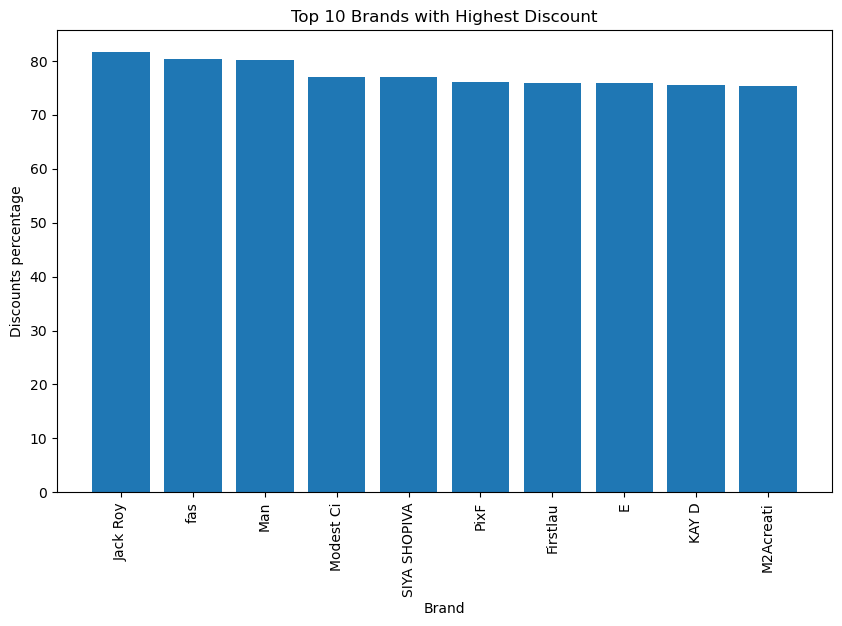

In [201]:
# showing top 10 brands with highest discounts

df_sorted = discount.sort_values(by='discount', ascending=False)

# Selecting the top 10 rows
top_10 = df_sorted.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_10['brand'], top_10['discount'])
plt.xlabel('Brand')
plt.ylabel('Discounts percentage')
plt.title('Top 10 Brands with Highest Discount')
plt.xticks(rotation=90)  
plt.show()

- So This shows the average discount on top 10 brand which is more than 75 % off even "Jack Roy has more than 80 % off.

In [114]:
# out of stock

df_2['out_of_stock'].value_counts()

False    28258
True      1742
Name: out_of_stock, dtype: int64

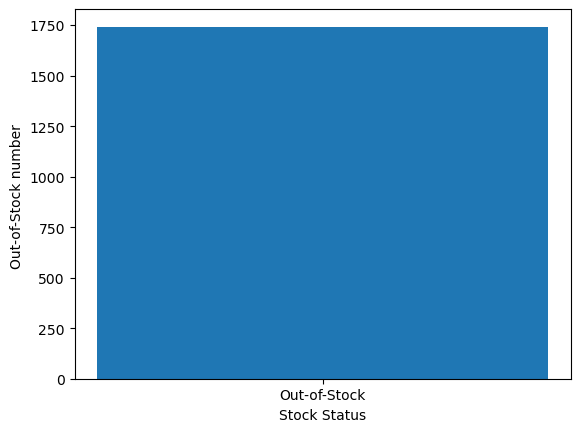

In [139]:
# plotting number of out of stocks

out_of_stock_brands = df_2.loc[df_2['out_of_stock'] == True, 'brand']

# count of out-of-stock brands
num_out_of_stock_brands = len(out_of_stock_brands)


plt.bar(['Out-of-Stock'], [num_out_of_stock_brands])
plt.xlabel('Stock Status')
plt.ylabel('Out-of-Stock number ')
plt.show()

In [138]:
# Name of brands which are out of stocks

# filtering the rows where brands are out of stock
out_of_stock_brands = df_2.loc[df_2['out_of_stock'] == True, 'brand']
print("Out-of-stock brands:", out_of_stock_brands.unique().tolist())
print("*********************************************************")
print("Number of out of stock brands", len(out_of_stock_brands.unique().tolist()))

Out-of-stock brands: [nan, 'Man', 'DISCOUNT OUTL', 'adidas Origina', 'SayItLo', 'ShreeR', 'Fairdea', 'Jack Roy', 'Solid Styl', 'BOYT', 'REEB', 'Platin', 'INTER CREATI', 'AXMA', 'REF', 'MagMatri', 'Crocks Cl', 'Vector', 'limited colou', 'Cher', 'VOXA', 'Kt Kun', 'LOUIS MONAR', 'FOREVER YOU', 'U.S. Polo Ass', 'U.S.Polo As', 'U.S. POLO ASS', 'Bone', 'Vibrant Vestu', 'SATDEVANGIKHADIBHAND', 'M7 By Metrona', 'Wab', 'REAZ', 'HUMBE', 'NEXT ', 'G', 'Lafant', 'Inspi', 'Szto', 'V', 'MASH UNLIMIT', 'ProUrb', 'Breakboun', 'ALQI', 'Gracew', 'True Bl', 'Dex', 'Steenb', 'ECKO Unl', 'ATTIITU', 'ertugrul ghazi c', 'K', 'VIKING.INE', 'Marca Disa', 'Firstlau', 'Asa', 'Scott Internation', 'GLAUBEN PO', 'Mohr', 'Lev', 'The Dry Ca', 'Byford by Pantaloo', 'TEE BUD', 'GANTI', 'Urban D', 'U.s.Polo Associati', 'CANTAB', 'Bra', 'Reen', 'GYMBROTHE', 'TeeMoo', 'RED TI', 'Musta', 'Sherr', 'RodZ', 'yellowvib', 'PixF', 'Almo We', 'Lucky Rog', 'Truemo', 'FLEXIM', 'FOOT F', 'oysho', 'YOGA', 'Adam Park', 'PRANE', 'T10 S

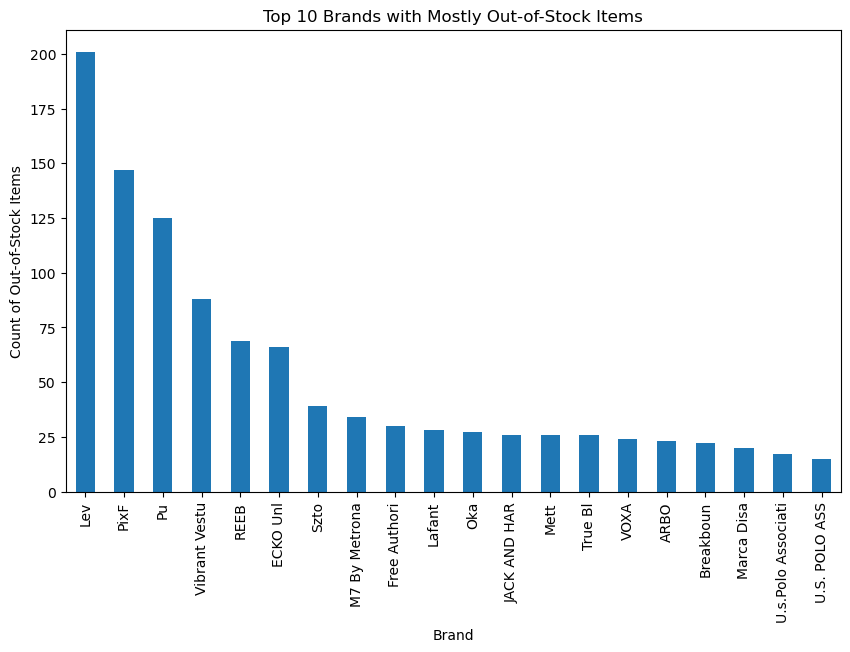

In [128]:
# Top 20 brands which has mostly out_of_stock items

out_of_stock_counts = df_2.groupby('brand')['out_of_stock'].sum()

# selecting top 20 brands
top_20_brands = out_of_stock_counts.nlargest(20)

top_20_brands.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Brand')
plt.ylabel('Count of Out-of-Stock Items')
plt.title('Top 10 Brands with Mostly Out-of-Stock Items')
plt.show()

In [132]:
# Showing categories which is out-of-stock

# filtering the rows where category are out of stock
out_of_stock_category = df_2.loc[df_2['out_of_stock'] == True, 'category']
print("Out-of-stock category:", out_of_stock_category.unique().tolist())

Out-of-stock category: ['Clothing and Accessories', 'Footwear']


In [140]:
# showing sub_categories whcih is out of stock

# filtering the rows where sub-category are out of stock
out_of_stock_sub_category = df_2.loc[df_2['out_of_stock'] == True, 'sub_category']
print("Out-of-stock sub-category:", out_of_stock_sub_category.unique().tolist())
print("*********************************************************")
print("Number of out of stock sub-category", len(out_of_stock_sub_category.unique().tolist()))

Out-of-stock sub-category: ['Clothing Accessories', 'Winter Wear', 'Topwear', 'Bottomwear', 'Innerwear and Swimwear', 'Blazers, Waistcoats and Suits', 'Tracksuits', 'Sleepwear', "Men's Footwear", 'Kurtas, Ethnic Sets and Bottoms', 'Inspire Clothing and Accessories', 'Raincoats', 'Uber Urban Clothing and Accessories']
*********************************************************
Number of out of stock sub-category 13


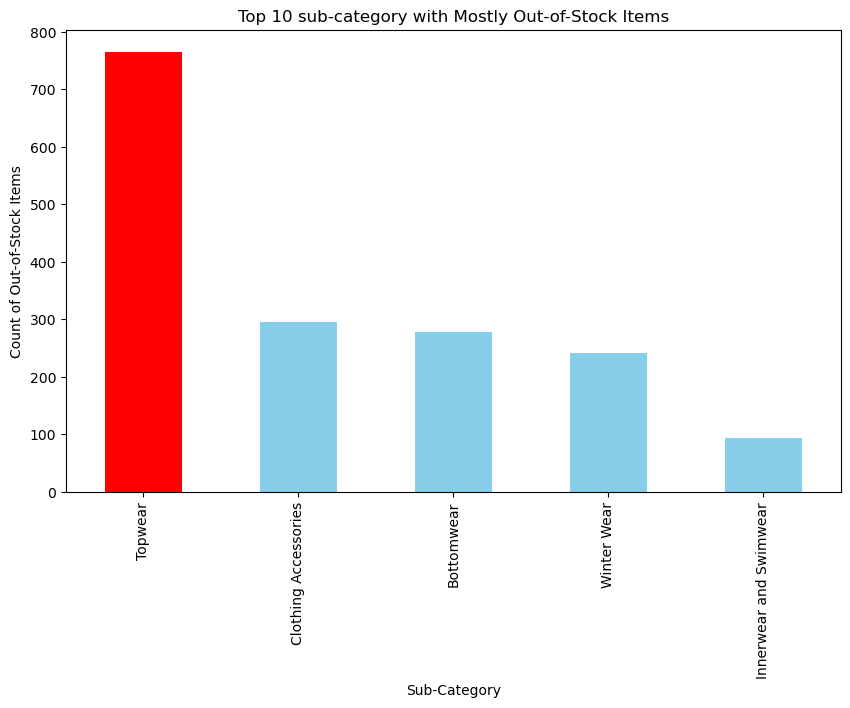

In [199]:
# Top 5 sub-categories which has mostly out_of_stock items

out_of_stock_sub_category_counts = df_2.groupby('sub_category')['out_of_stock'].sum()

# selecting top 5 brands
top_5_sub_categories = out_of_stock_sub_category_counts.nlargest(5)

color = ['skyblue'] * 5
color[0] = 'red' 

top_5_sub_categories.plot(kind='bar', figsize=(10, 6), color=color)
plt.xlabel('Sub-Category')
plt.ylabel('Count of Out-of-Stock Items')
plt.title('Top 10 sub-category with Mostly Out-of-Stock Items')
plt.show()

- There are 1742 item which is out of stock in the dataset.
- There are 115 brands which is out of stock, we can see the name of the brand as well in the list.
- Lev has 200, PixF has around 150, Pu has around 125 out of stock items.
- 'Clothing and Accessories', 'Footwear' are the categories which have out of stocks items.
- There are 13 sub-categories which has out of stock items.
- Sub-categories  - Topwear has 760 out of stock items, Clothing Accesories, Bottomwear, Winter wear has almost similar out of stock items

In [12]:
import re
def is_valid_password(password):
    if not re.search(r'(\d+)([a-zA-Z]+)([@&]?){5,10}', password):
        return False
    
    return True

password = input("Enter your password: ")
if is_valid_password(password):
    print("Valid password.")
else:
    print("Invalid password.")

Enter your password: Ash@123
Invalid password.


In [10]:
is_valid_password('Ash@123')

False

In [13]:
import re

def is_valid_password(password):
    
    if len(password) < 5:
        return False
    
    
    if len(password) > 10:
        return False
    
    
    if not re.search(r'[a-zA-Z]', password):
        return False
    
    
    if not re.search(r'[0-9]', password):
        return False
    
    
    if not re.search(r'[@&]', password):
        return False
    
   
    return True


password = input("Enter a password: ")
if is_valid_password(password):
    print("Valid password.")
else:
    print("Invalid password.")

Enter a password: Ash@123
Valid password.
